In [1]:
# All the imports we might require

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [2]:
raw_dataframe = pd.read_csv("train.csv")

In [3]:
raw_dataframe.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
raw_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Count of NaN data in every column:")
raw_dataframe.isna().sum()


# One thought i had was that since age is an important feature and there are 177 nan values,
#     predicting these values based on some other feature using linear regression could be of great help
# However taking a look at the correlation matrix later:
#     it is quite evident that none of the other features have strong positive or negative correlation with any other
#      feature so mapping the age for the remaining nan values is not a viable option.

Count of NaN data in every column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Elimination of these nan values

In [7]:
def initSex(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 2}).astype(int)
    return df

def initEmbarked(df):
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map({'C': 1, 'S': 2,'Q': 3})
    return df

def initAge(df):
    meanAge = df['Age'].mean()
    standardAge = df['Age'].std()
    nanAgeCount = df['Age'].isna().sum()
    upperLimit = meanAge+standardAge
    lowerLimit = meanAge-standardAge
    randomiserList = np.random.randint(lowerLimit,upperLimit,nanAgeCount)
    df.loc[df['Age'].isnull(), 'Age'] = randomiserList
    return df

def initCabin(df):
    df['CabinFlag'] = df['Cabin'].apply(lambda x: 0 if type(x)==float else 1)
    return df

def initFeatures(df):
    df['AgeClass'] = df.loc[:,'Age']*df.loc[:,'Pclass']
    df['SexAge'] = df.loc[:,'Sex']*df.loc[:,'Age']
    return df

def dropCols(df):
    df = df.drop("Name",axis=1)
    df = df.drop("Ticket",axis=1)
    df = df.drop("Cabin",axis=1)
    return df
    
def edit_dataframe(df):
    df = initSex(df)
    df = initEmbarked(df)
    df = initAge(df)
    df = initCabin(df)
    df = initFeatures(df)
    df = dropCols(df)
    return df

In [8]:
new_dataframe = edit_dataframe(raw_dataframe)

In [9]:
new_dataframe.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinFlag,AgeClass,SexAge
0,1,0,3,2,22.0,1,0,7.2500,2,0,66.0,44.0
1,2,1,1,1,38.0,1,0,71.2833,1,1,38.0,38.0
2,3,1,3,1,26.0,0,0,7.9250,2,0,78.0,26.0
3,4,1,1,1,35.0,1,0,53.1000,2,1,35.0,35.0
4,5,0,3,2,35.0,0,0,8.0500,2,0,105.0,70.0
5,6,0,3,2,19.0,0,0,8.4583,3,0,57.0,38.0
6,7,0,1,2,54.0,0,0,51.8625,2,1,54.0,108.0
7,8,0,3,2,2.0,3,1,21.0750,2,0,6.0,4.0
8,9,1,3,1,27.0,0,2,11.1333,2,0,81.0,27.0
9,10,1,2,1,14.0,1,0,30.0708,1,0,28.0,14.0


In [10]:
cab = np.array(raw_dataframe['Cabin']) #Im very comfortable working wtih numpy arrays

In [11]:
for _ in range(len(cab)):               # Converting the Cabin strings to numerical data
    if type(cab[_]) == str:
        if cab[_][0] == 'A':
            cab[_] = 1
        elif cab[_][0] == 'B':
            cab[_] = 2
        elif cab[_][0] == 'C':
            cab[_] = 3
        elif cab[_][0] == 'D':
            cab[_] = 4
        elif cab[_][0] == 'E':
            cab[_] = 5
        elif cab[_][0] == 'F':
            cab[_] = 6
        elif cab[_][0] == 'G':
            cab[_] = 7
        elif cab[_][0] == 'H':
            cab[_] = 8
        elif cab[_][0] == 'T':
            cab[_] = 9
    else:
        cab[_] = 0

In [12]:
cab = pd.Series(cab)
new_dataframe['cabin'] = cab
new_dataframe.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinFlag,AgeClass,SexAge,cabin
0,1,0,3,2,22.0,1,0,7.2500,2,0,66.0,44.0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1,38.0,38.0,3
2,3,1,3,1,26.0,0,0,7.9250,2,0,78.0,26.0,0
3,4,1,1,1,35.0,1,0,53.1000,2,1,35.0,35.0,3
4,5,0,3,2,35.0,0,0,8.0500,2,0,105.0,70.0,0
5,6,0,3,2,19.0,0,0,8.4583,3,0,57.0,38.0,0
6,7,0,1,2,54.0,0,0,51.8625,2,1,54.0,108.0,5
7,8,0,3,2,2.0,3,1,21.0750,2,0,6.0,4.0,0
8,9,1,3,1,27.0,0,2,11.1333,2,0,81.0,27.0,0
9,10,1,2,1,14.0,1,0,30.0708,1,0,28.0,14.0,0


In [13]:
print("Count of NaN data in every column:")
new_dataframe.isna().sum()
# We have successfully eliminated all the 'Not a Number' values from our dataset 

Count of NaN data in every column:


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinFlag      0
AgeClass       0
SexAge         0
cabin          0
dtype: int64

##  Correlation matrix

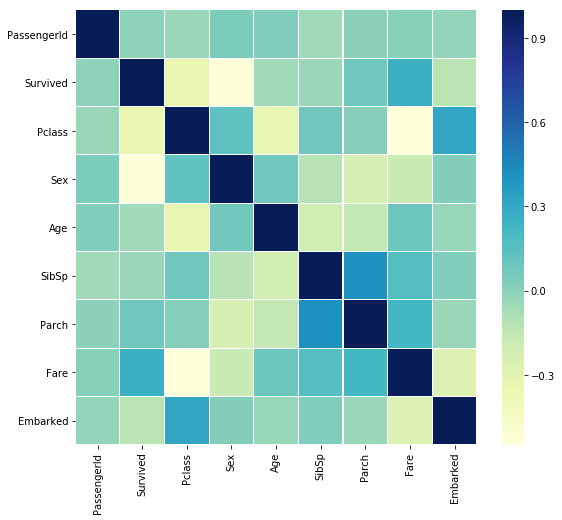

In [14]:
dt = new_dataframe[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']] # Filtering out the columns I wish to compare
corrmat = dt.corr()        # Correlation matrix
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [15]:
# Clearly Parch and Sbsp have a stronger positive correlation than any other set of features
# Also P class and Sex have very strong ~ -1 negative correlation:
#    Logistic Regression can map the two features very well 
# Sex and survived also have considerably high negative correlation
# Survived has the highest positive correlation with Fare: This means that this feature will have the largest
#    weights in linear regression,logistic regression and neural networks.
# The remaining features dont have much to tell by simply comparing correlations

## Scaling down values to zero mean and Unit std values

In [16]:
new_dataframe.columns[:]  # Taking a look at all the columns of the new dataframe

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'CabinFlag', 'AgeClass', 'SexAge', 'cabin'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()   # reduces all values to zero mean and unit standard deviation values
# The data mostly follows a gaussian distribution

In [19]:
scaled_features = scaler.fit_transform(new_dataframe.drop('Survived',axis = 1)) # Effective values are Z = X-u/sigma

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
df_feat = pd.DataFrame(scaled_features,columns =  ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'CabinFlag', 'AgeClass', 'SexAge','cabin'] )

In [21]:
df_feat.describe()
# Clearly all the values have been normalized to zero mean and unit Standard deviation values
# This is very important for models such as Neural Nets: Can help in preventing vanishing gradients
#    and can also help find the global or optimum local minimum with relative ease
# Support vector Machines: Since these models classify with the help of an optimum plane and its support vectors:
# Having normalised values condenses the region of data spread making it easier to handle and choose kernels for

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinFlag,AgeClass,SexAge,cabin
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.517004e-17,-2.031048e-16,-4.059603e-16,5.460777e-17,3.456519e-16,6.716164e-17,-4.373606e-17,1.101501e-16,-2.583044e-16,-1.860340e-16,7.837601e-17,7.594623e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-1.566107e+00,-1.355574e+00,-2.137488e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-1.745685e+00,-5.449250e-01,-1.859270e+00,-1.721515e+00,-4.874980e-01
25%,-8.650540e-01,-3.693648e-01,-1.355574e+00,-6.870147e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,1.985717e-01,-5.449250e-01,-7.060580e-01,-6.717574e-01,-4.874980e-01
50%,0.000000e+00,8.273772e-01,7.376951e-01,-9.438006e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01,1.985717e-01,-5.449250e-01,-1.158780e-01,-1.693091e-01,-4.874980e-01
75%,8.650540e-01,8.273772e-01,7.376951e-01,5.723339e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.985717e-01,-5.449250e-01,5.923380e-01,5.484743e-01,-4.874980e-01
max,1.730108e+00,8.273772e-01,7.376951e-01,3.757745e+00,6.784163e+00,6.974147e+00,9.667167e+00,2.142828e+00,1.835115e+00,4.664580e+00,3.993834e+00,5.153551e+00


In [22]:
def showData(df):
    for i in range(2,len(df.columns)):
        Parameters = df.columns[i]
        plt.hist(x = [df[df['Survived']==1][Parameters], df[df['Survived']==0][Parameters]], label = ['Survived','Dead'])
        plt.title('Survival')
        plt.xlabel(Parameters)
        plt.ylabel('Number of Passengers')
        plt.legend()
        plt.show()

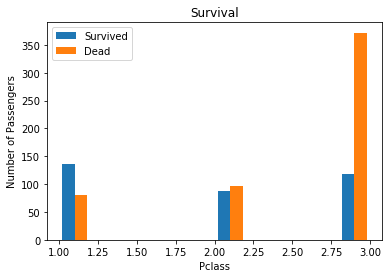

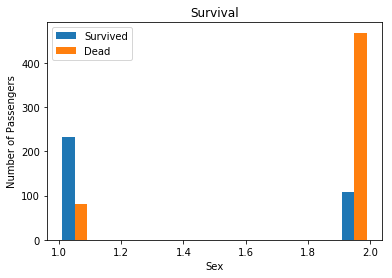

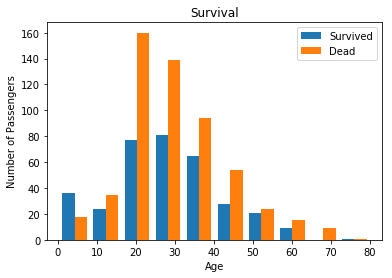

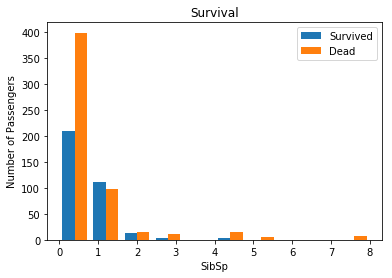

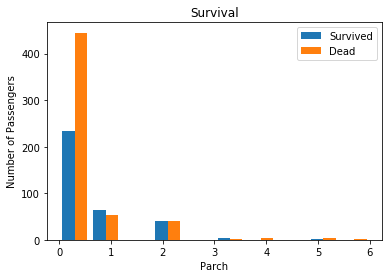

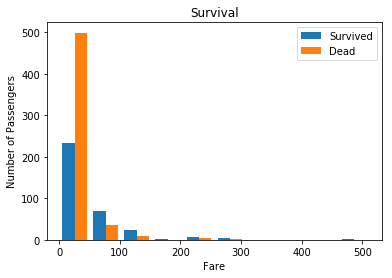

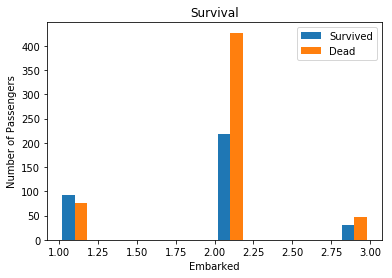

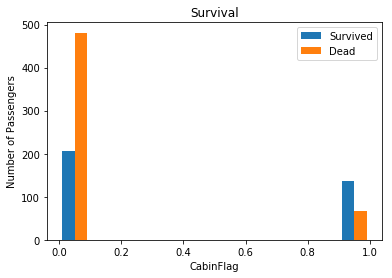

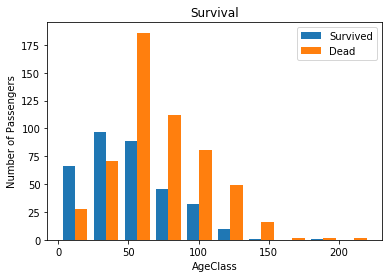

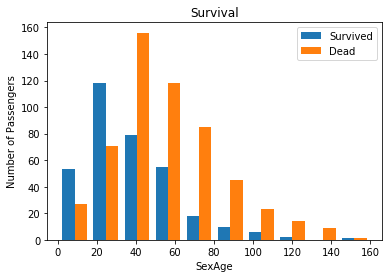

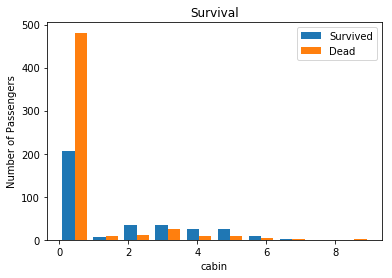

In [23]:
showData(new_dataframe)

In [24]:
train_x, test_x, train_y, test_y = train_test_split(
    new_dataframe.loc[:, ('Pclass','Sex','Age','SibSp','Parch','Embarked','CabinFlag','AgeClass','SexAge')],
    new_dataframe.loc[:, ('Survived')], 
    test_size=0.3, 
    random_state=6)
# working with unscaled data

In [25]:
train_x = np.array(train_x)
X_val = train_x[:50]
train_y = np.array(train_y)
y_val = train_y[:50]
train_x = train_x[50:]
train_y = train_y[50:]
test_x = np.array(test_x)
test_y = np.array(test_y)

## K nearest Neighbours

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, 
                                                    new_dataframe['Survived'], 
                                                    test_size=0.3, 
                                                    random_state=42)
# Working with scaled data
# Note the test size is 0.3

In [27]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the knn model

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)           # Instanciating it with no of neighbours = 1

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
pred = knn.predict(X_test)

In [31]:
for i in [accuracy_score,confusion_matrix,classification_report]:
    print(i(y_test,pred))
    print()
    
# Clearly 1 neighbour does not tell us much 
# So lets plot the model preformance vs k to choose a better k

0.7574626865671642

[[127  30]
 [ 35  76]]

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       157
           1       0.72      0.68      0.70       111

   micro avg       0.76      0.76      0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268




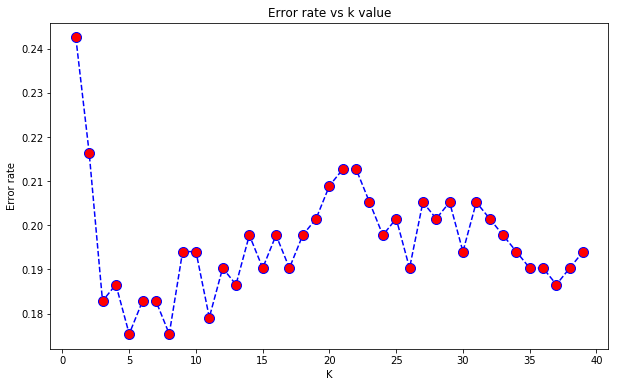

In [32]:
error = []

for i in range(1,40):                         # Collecting error values for no of neighbours in (1,40)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color = 'blue',linestyle = 'dashed',marker = 'o',
        markerfacecolor = 'red',markersize = 10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [33]:
# WE see that we can achieve minimum loss with K = 5 and we clearly are not overfitting here

In [34]:
knn = KNeighborsClassifier(n_neighbors=9)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [36]:
pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('accuracy score',accuracy_score(y_test,pred))

[[140  17]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

accuracy score 0.8059701492537313


## Support Vector Machines

In [39]:
from sklearn.svm import SVC

In [40]:
svm = SVC(C = 1)    # Setting the misclassification penalty as 1 to start with

In [41]:
svm.fit(X_train,y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
pred_svm = svm.predict(X_test)

In [43]:
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))
print(accuracy_score(y_test,pred_svm))

[[145  12]
 [ 33  78]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.87       157
           1       0.87      0.70      0.78       111

   micro avg       0.83      0.83      0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.83       268

0.832089552238806


In [44]:
from sklearn.model_selection import GridSearchCV 
# Here C and gamma are the two paramters we can alter to look for better values and consequently better performance
# C is the misclassification allowed by the models support vector 
# Gamma is the magnitude of the Functional Margin

In [45]:
grid = {'gamma' : [1,0.1,0.01,0.001,0.0001],'C':[0.1,1,10,100,1000]} 
# dictionary of all the Possible C and gamma values we would like
# the model to try

In [46]:
gridcv = GridSearchCV(SVC(),grid,verbose = 3)

In [47]:
gridcv.fit(X_train,y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6298076923076923, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6298076923076923, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6280193236714976, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8028846153846154, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7644230769230769, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7536231884057971, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[CV] ........ C=1000, gamma=1, score=0.6778846153846154, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6521739130434783, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.7596153846153846, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .................. C=1000, gamma=0.1, score=0.6875, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.7536231884057971, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.8269230769230769, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.7788461538461539, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [48]:
gridcv.best_params_

{'C': 100, 'gamma': 0.01}

In [49]:
gridcv.best_score_

0.8138041733547352

In [50]:
grid_pred = gridcv.predict(X_test)

In [51]:
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))
print(accuracy_score(y_test,grid_pred))

[[145  12]
 [ 39  72]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.86      0.65      0.74       111

   micro avg       0.81      0.81      0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.82      0.81      0.80       268

0.8097014925373134


In [52]:
# Surprisingly gridsearchcv outputs a poorer performing model than the one we originally had

## Logistic Regression with sklearn

In [53]:
lg = sklearn.linear_model.LogisticRegression()

In [54]:
lg.fit(X_train,y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
pred_lg = lg.predict(X_test)

In [56]:
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))
print(accuracy_score(y_test,pred_lg))

[[137  20]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

0.8134328358208955


## Using a keras dense NN

In [57]:
import keras

Using TensorFlow backend.


In [58]:
X_train_partial = X_train[100:]
y_train_partial = y_train[100:]
X_val = X_train[:100]
y_val = y_train[:100]

In [59]:
from keras import models
from keras import layers

In [60]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (12,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1 ,activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [61]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [62]:
epoch = 15
data = model.fit(X_train_partial,y_train_partial,epochs = epoch,validation_data=(X_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 523 samples, validate on 100 samples
Epoch 1/15
523/523 [==============================] - 0s 687us/step - loss: 0.6440 - acc: 0.6138 - val_loss: 0.6684 - val_acc: 0.6400
Epoch 2/15
523/523 [==============================] - 0s 30us/step - loss: 0.5972 - acc: 0.7706 - val_loss: 0.6392 - val_acc: 0.6800
Epoch 3/15
523/523 [==============================] - 0s 30us/step - loss: 0.5681 - acc: 0.7801 - val_loss: 0.6163 - val_acc: 0.7200
Epoch 4/15
523/523 [==============================] - 0s 30us/step - loss: 0.5433 - acc: 0.7801 - val_loss: 0.5999 - val_acc: 0.7200
Epoch 5/15
523/523 [==============================] - 0s 60us/step - loss: 0.5222 - acc: 0.7839 - val_loss: 0.5863 - val_acc: 0.7000
Epoch 6/15
523/523 [==============================] - 0s 30us/step - loss: 0.5034 - acc: 0.7820 - val_loss: 0.5743 - val_acc: 0.7100
Epoch 7/15
523/523 [==============================] - 0s 30us/step - loss: 0.4863 - acc: 0.7820 - val_loss:

In [63]:
data_dict = data.history
data_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

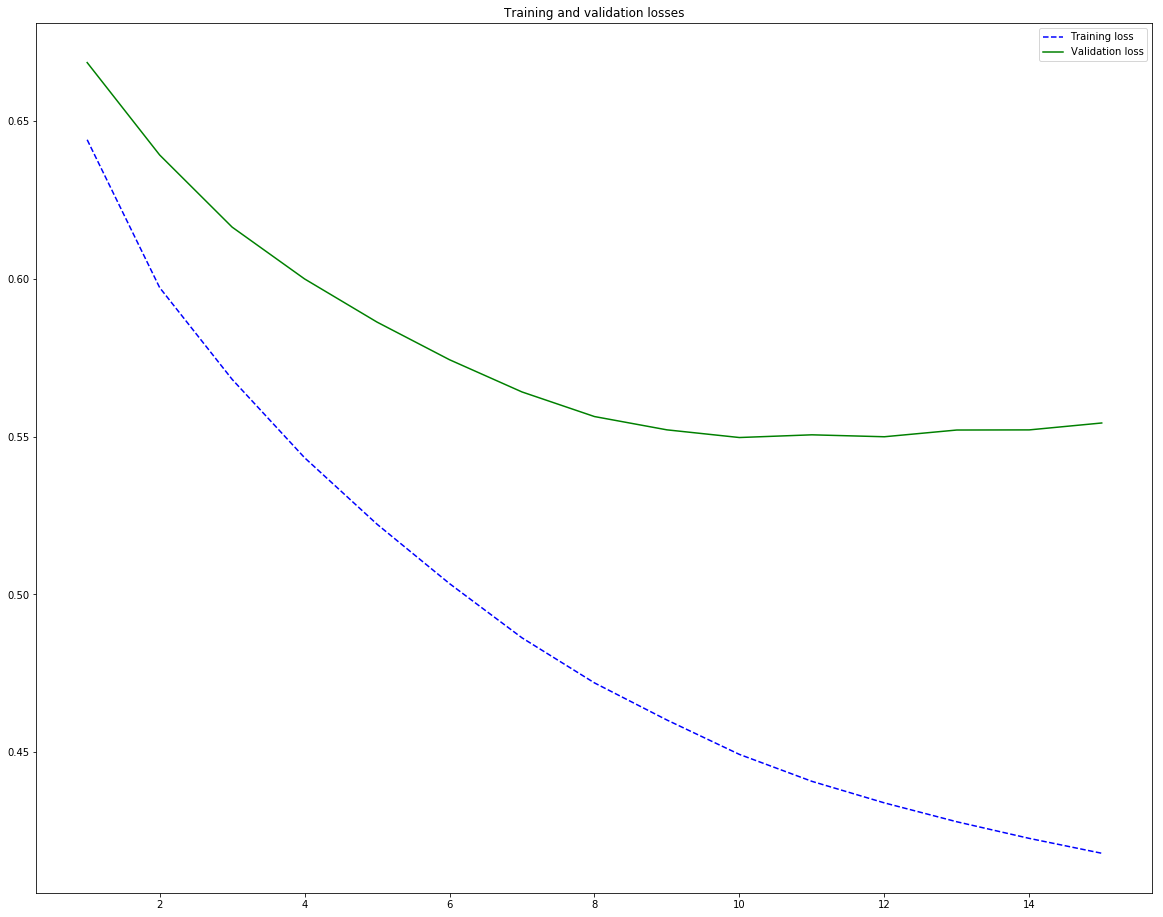

In [64]:
import matplotlib.pyplot as plt
data_dict = data.history
loss_values = data_dict['loss']
val_loss_values = data_dict['val_loss']

epochs = range(1,epoch +1)
plt.figure(figsize=(20,16))
plt.plot(epochs,loss_values,'b--',label = "Training loss")
plt.plot(epochs,val_loss_values,'g',label = 'Validation loss')
plt.title("Training and validation losses")
plt.legend()
plt.show()


In [65]:
results = model.evaluate(X_test,y_test)

268/268 [==============================] - 0s 0us/step


In [66]:
print("accuracy of our model is : ",results[1])

accuracy of our model is :  0.8134328349312739


In [67]:
# The model begins to perform poorly on the validation data ie; Overfits soon after 10 epochs
# Stopping the model training after 10 epochs gives us an accuracy of ~ 82.3 %

## Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
acc = []
for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    tree_pred = tree.predict(X_test)
    acc.append(accuracy_score(y_test,tree_pred))
    
# Plotting out accuracy for model vs num_depth

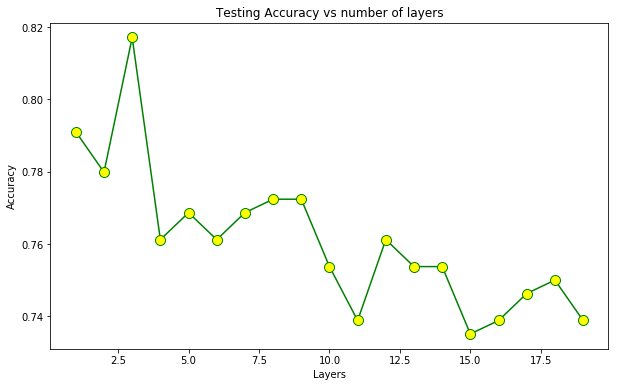

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'green',marker = 'o',
        markerfacecolor = 'yellow',markersize = 10)
plt.title('Testing Accuracy vs number of layers')
plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.show()

In [71]:
# WE achieve max accuracy for max_depth = 3
# Beyond this we are overfitting

In [72]:
tree_imp = DecisionTreeClassifier(max_depth=3)

In [73]:
tree_imp.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
tree_imp_pred = tree_imp.predict(X_test)

In [75]:
print(confusion_matrix(y_test,tree_imp_pred))
print(classification_report(y_test,tree_imp_pred))
print(accuracy_score(y_test,tree_imp_pred))

[[139  18]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

   micro avg       0.82      0.82      0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

0.8171641791044776


## Principal Component Analysis

In [76]:
# About PCA :
# I havent studied much about it, all i know is that features are categorised 
#     into the important vs non important features using eigen decomposition and Singular Value Decomposition
# I have copied the code from a stackoverflow post
# I do not know how to interpret the visualizations here 
# It would be of great help if you could teach me how to analyse and use these
#     new features to improve the existing supervised ML models ...thank you :)

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)

In [79]:
pca.fit(df_feat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
x_pca = pca.transform(df_feat)

In [81]:
x_pca.shape

(891, 2)

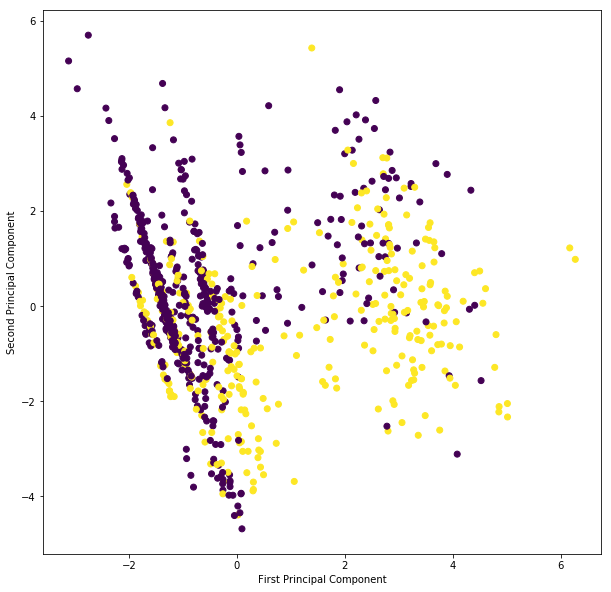

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c = new_dataframe['Survived'],cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [83]:
df_comp = pd.DataFrame(pca.components_,columns = df_feat.columns)

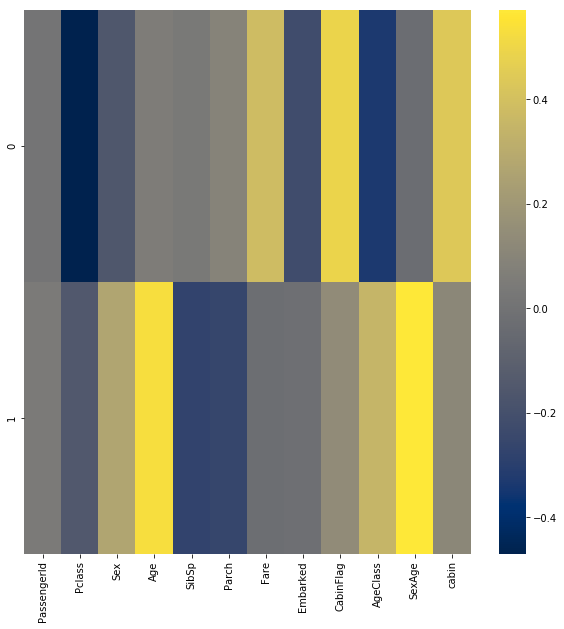

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df_comp,cmap = 'cividis')

## Training on models written from scratch

## KNN from scratch

In [85]:
import numpy as np
from future.utils import iteritems
from sortedcontainers import SortedList
import random
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix



class KNN():
    def __init__(self,k):
        self.k = k
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def predict(self,X):
        p = np.zeros(len(X))
        for i,x in enumerate(X):
            s1 = SortedList()
            for j,xt in enumerate(self.X):
                diff = x - xt
                d = diff.dot(diff)
                if len(s1) < self.k:
                    s1.add((d,self.y[j]))
                else:
                    if d < s1[-1][0]:
                        del s1[-1]
                        s1.add((d,self.y[j]))
            votes = {}
            for _,v in s1:
                votes[v] = votes.get(v,0) + 1
                
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count>max_votes:
                    max_votes = count 
                    max_votes_class = v
            p[i] = max_votes_class
        return p
    
    def score(self,X,Y):
        P = self.predict(X)
        return np.mean(P == Y)

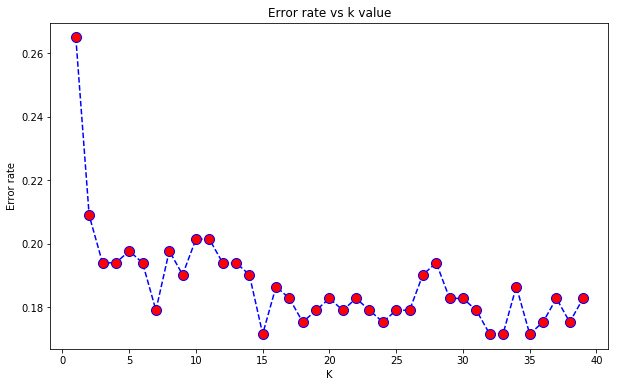

In [86]:
error = []

for i in range(1,40):                         # Collecting error values for no of neighbours in (1,40)
    knn = KNN(k=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color = 'blue',linestyle = 'dashed',marker = 'o',
        markerfacecolor = 'red',markersize = 10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [96]:
# k = 15 is good solutions though it seems like k = 15 suits more by chance

In [97]:
knn = KNN(15)

In [98]:
knn.fit(train_x,train_y)

In [99]:
pred_knn = knn.predict(test_x)

In [100]:
for i in [accuracy_score,confusion_matrix,classification_report]:
    print(i(test_y,pred_knn))
    print()

0.8283582089552238

[[159  15]
 [ 31  63]]

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       174
           1       0.81      0.67      0.73        94

   micro avg       0.83      0.83      0.83       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.83      0.83      0.82       268




## Logistic Regression from scratch

In [101]:
# Running a Logistic Regression model on the data built from scratch

In [102]:
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


class LogisticRegression:
    def __init__(self, lr=0.0001, num_iters=100000):
        self.lr = lr
        self.num_iters = num_iters
    
    def __add_ones(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __cross_entropy(self, t, y):
        return (-y * np.log(t) - (1 - y) * np.log(1 - t)).mean()
    
    def fit(self, X, y, X_val, y_val):

        X = self.__add_ones(X)
        X_val = self.__add_ones(X_val)
        
        # weights initialization
        self.W = np.random.randn(X.shape[1])
        loss_val = []
        loss_train = []
        i_list = []
        
        for _ in range(self.num_iters):
            z = np.dot(X, self.W)
            t = self.__sigmoid(z)
            grad = np.dot(X.T, (t - y))
            self.W -= self.lr * grad
            
            if _%(self.num_iters/20) == 0:
                print("Training iteration: {} ".format(_))
                
                matmul1 = np.dot(X_val, self.W)
                x_val_pred = np.round(self.__sigmoid(matmul1))
                acc1 = accuracy_score(y_val,x_val_pred)
                loss_val.append(acc1)
                
                matmul2 = np.dot(X, self.W)
                x_train_pred = np.round(self.__sigmoid(matmul2))
                acc2 = accuracy_score(y,x_train_pred)
                loss_train.append(acc2)
                
                i_list.append(_)
                        
        plt.plot(i_list,loss_val,'g-',label = "Validation accuracy")
        plt.plot(i_list,loss_train,'b--',label = "Training accuracy")
        plt.title("Training and validation Accuracies")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.show()
                
                
                
    
    def __prob(self, X):
        X = self.__add_ones(X)
        return self.__sigmoid(np.dot(X, self.W))
    
    def predict(self, X):
        return np.round(self.__prob(X))

In [103]:
lgr = LogisticRegression(lr = 0.0003,num_iters=7000)

In [105]:
train_x = np.array(train_x)
X_val = train_x[:50]
train_y = np.array(train_y)
y_val = train_y[:50]
train_x = train_x[50:]
train_y = train_y[50:]
test_x = np.array(test_x)
test_y = np.array(test_y)

Training iteration: 0 
Training iteration: 350 
Training iteration: 700 
Training iteration: 1050 
Training iteration: 1400 
Training iteration: 1750 
Training iteration: 2100 
Training iteration: 2450 
Training iteration: 2800 
Training iteration: 3150 
Training iteration: 3500 
Training iteration: 3850 
Training iteration: 4200 
Training iteration: 4550 
Training iteration: 4900 
Training iteration: 5250 
Training iteration: 5600 
Training iteration: 5950 
Training iteration: 6300 
Training iteration: 6650 


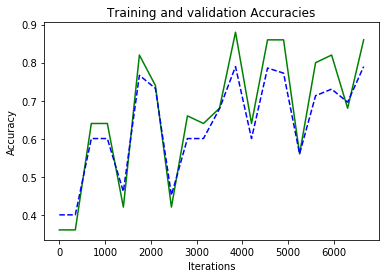

In [106]:
lgr.fit(train_x,train_y,X_val = X_val,y_val = y_val)

In [107]:
pred = lgr.predict(test_x)

In [108]:
for i in [accuracy_score,confusion_matrix,classification_report]:
    print(i(test_y,pred))
    print()
    print("------------------------------------------------------")

0.8059701492537313

------------------------------------------------------
[[169   5]
 [ 47  47]]

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       174
           1       0.90      0.50      0.64        94

   micro avg       0.81      0.81      0.81       268
   macro avg       0.84      0.74      0.76       268
weighted avg       0.83      0.81      0.79       268


------------------------------------------------------


In [110]:
# I have also added a file with all the models i have trained from scratch:
# knn
# logistic regression
# Linear Regression

## Thank you 